In [16]:
import configparser
from psycopg2 import connect
import psycopg2.sql as pg
import pandas.io.sql as pandasql
import pandas as pd
import matplotlib.pyplot as plt

# connect to database
CONFIG = configparser.ConfigParser()
CONFIG.read(r'C:\Users\alouis2\Documents\Python Scripts\db.cfg')
dbset = CONFIG['DBSETTINGS']
con = connect(**dbset)


query = open('front_percentage.sql', 'r',  encoding='utf-8-sig')

frontbt = pd.read_sql_query(query.read(),con)

In [19]:
frontbt['percentage'] = frontbt['obs']/frontbt['volume']
frontbt.head(15)

,datetime_bin,obs,volume,percentage
0,2017-11-01 00:00:00,2,85.0,0.023529
1,2017-11-01 00:30:00,2,75.0,0.026667
2,2017-11-01 01:00:00,4,72.0,0.055556
3,2017-11-01 01:30:00,3,61.0,0.049180
4,2017-11-01 02:00:00,1,50.0,0.020000
5,2017-11-01 02:30:00,3,70.0,0.042857
6,2017-11-01 03:00:00,4,52.0,0.076923
7,2017-11-01 03:30:00,2,31.0,0.064516
8,2017-11-01 04:30:00,5,24.0,0.208333
9,2017-11-01 05:00:00,1,32.0,0.031250


C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


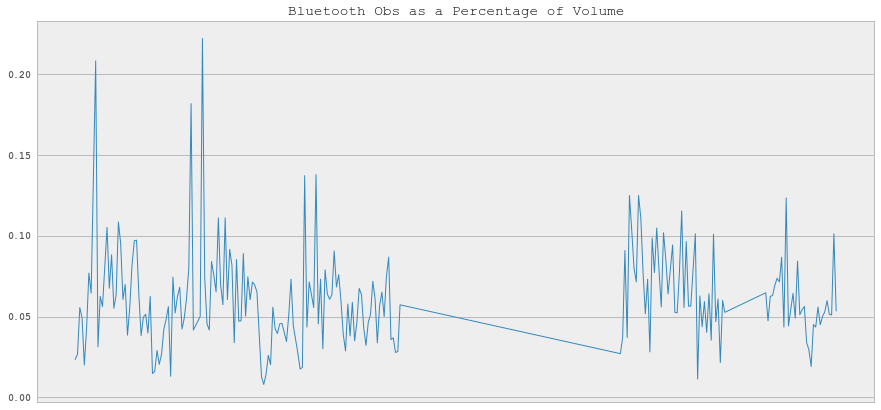

In [27]:
pd.options.display.mpl_style = 'default'
plt.figure(figsize = (15,7))
plt.plot(frontbt['datetime_bin'], frontbt['percentage'])
plt.title('Bluetooth Obs as a Percentage of Volume')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)
plt.xticks(rotation = 45)
plt.axes().get_xaxis().set_ticks([])
plt.show()